# Practice Problems 10

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import ops
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations

## Exercise 1

Solve the following exercises from [Bis24]:


### Exercise 1.a (19.2 pg 578)

Verify that if $\epsilon$ has a zero-mean unit-variance Gaussian distribution, then the variable $z$ in:

$$z = \sigma \, \epsilon + \mu$$

will have a Gaussian distribution with mean $\mu$ and variance $\sigma^2$

#### Aproach 1

In order to solve this first task knowing that $\epsilon \sim \mathcal{N}(0, 1)$, we will rewrite this expression using the PDF from the random variable:

$$f_{\epsilon}(\epsilon) = \frac{1}{\sqrt{2 \pi}} e^{\frac{-\epsilon ^2}{2}}$$

Now we will rewrite our expression $\epsilon$ in terms of $z$, $\sigma$ and $\mu$

$$\epsilon = \dfrac{z - \mu}{\sigma}$$

Now we can use the change of variable formula in order to write the PDF of the variable $z$. This formula says:

$$\text{Given } z = g(x) \, \wedge \,  x \sim f_x(x) \,\, \Longrightarrow \,\, f_z(z) = f_x(g^{-1} (z)) \cdot \left| \frac{d}{dz}g^{-1}(z) \right|$$

As we can say that $g^{-1}(z) = \frac{z - \mu}{\sigma}$, we can replace in the formula like the following:

$$
\begin{array}{ccl}
    f_z(z) & = & f_{\epsilon}\left(\frac{z - \mu}{\sigma}\right) \cdot \left| \frac{d}{dz}\left( \frac{z - \mu}{\sigma} \right)\right| \\ \\
           & = & \frac{1}{\sqrt{2 \pi}} e^{\frac{-\left(\frac{z - \mu}{\sigma}\right) ^2}{2}} \cdot \left| \frac{1}{\sigma} \right| \\ \\
           & = & \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{(z - \mu)^2}{2 \sigma^2}} \\ \\
           & \equiv & \mathcal{N}(\mu, \sigma^2)
\end{array}
$$

As we can see after applying the algebraic operations over the expression, we were able to reduce the formula to the PDF of the normal distribution with mean $\mu$ and variance $\sigma^2$. Then we can conclude that:

$$z \sim \mathcal{N}(\mu, \sigma^2)$$

#### Approach 2

For the second approach to solve this problem, we will use the definition of mean and variance using the expected value definition and properties.

For random variable $\epsilon$, we know that:

$$\mathbb{E}[\epsilon] = 0$$
$$\text{Var}(\epsilon) = \mathbb{E}[(\epsilon - \mathbb{E}[\epsilon])^2] = \mathbb{E}[\epsilon^2] = 1$$

Knowing that any linear transformation to a Gaussian distribution leads to another Gaussian distribution. Then what we must guarantee is that the mean and variance of the new distribution is corresponding to the expected ones:

1. Mean case $\mathbb{E}[z]$

    $$\mathbb{E}[z] =  \mathbb{E}[\sigma \, \epsilon + \mu] = \sigma \mathbb{E}[\epsilon] + \mathbb{E}[\mu] = 0 + \mu = \mu$$

    The mean of $z$ random variable is $\mu$

2. Variance case $\text{Var}[z]$

    $$\text{Var}(z) = \mathbb{E}[(z - \mathbb{E}[z])^2] = \mathbb{E}[(z - \mu)^2] = \mathbb{E}[(\sigma \, \epsilon)^2] = \sigma^2 \mathbb{E}[\epsilon^2] = \sigma^2 \cdot 1 = \sigma^2$$

    The variance of $z$ random variable is $\sigma^2$

With this, we can conclude that:

$$z \sim \mathcal{N}(\mu, \sigma^2)$$

### Exercise 1.b (19.5 pg 579)

We have seen that the ELBO given by:
$$
\begin{align*}
\mathcal{L}_n = \int q_n(\mathbf{z}_n) \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)}{q_n(\mathbf{z}_n)}\right\} \,\mathrm{d}\mathbf{z}_n.
\end{align*}
$$

can be written in the form:

$$
\begin{align*}
\mathcal{L}_n(\mathbf{w},\boldsymbol{\phi}) &= \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)}{q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})}\right\} \,\mathrm{d}\mathbf{z}_n \\
&= \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w}) \,\mathrm{d}\mathbf{z}_n - \mathrm{KL}\big(q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \| p(\mathbf{z}_n)\big).
\end{align*}
$$

Show it can also be written as

$$
\begin{align*}
\mathcal{L}_n(\mathbf{w},\boldsymbol{\phi}) &= \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})\ln\left\{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)\right\}\,\mathrm{d}\mathbf{z}_n \\
&\quad - \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})\ln q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})\,\mathrm{d}\mathbf{z}_n.
\end{align*}
$$

In order to develop this process, we will take into account two main properties about logarithms:

$$(1)\quad \log {(ab)} = \log{(a)} + \log{(b)}$$

$$(2)\quad \log {\left(\frac{a}{b}\right)} = \log{(a)} - \log{(b)}$$

Taking into account that, we will rewrite the logarithm part of the second expression and we will reorganize the terms:

$$
\begin{align*}
\mathcal{L}_n(\mathbf{w},\boldsymbol{\phi}) &= \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)}{q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})}\right\} \,\mathrm{d}\mathbf{z}_n \\
 &= \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \left( \ln\left\{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)\right\} - \ln q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})\right) \,\mathrm{d}\mathbf{z}_n & \quad \quad \quad& \text{Applying }(2) \\
&= \int  q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln\left\{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)\right\} - q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \,\mathrm{d}\mathbf{z}_n & \\
&= \int  q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln\left\{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)\right\} \,\mathrm{d}\mathbf{z}_n - \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \,\mathrm{d}\mathbf{z}_n & & \text{Q.E.D}
\end{align*}
$$

### Exercise 1.c (19.6 pg 579)

Show that the ELBO given by:

$$
\begin{align*}
\mathcal{L}_n = \int q_n(\mathbf{z}_n) \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)}{q_n(\mathbf{z}_n)}\right\} \,\mathrm{d}\mathbf{z}_n.
\end{align*}
$$

can be written in the form:

$$
\begin{align*}
\mathcal{L}_n(\mathbf{w},\boldsymbol{\phi}) &= \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln p(\mathbf{z}_n) \,\mathrm{d}\mathbf{z}_n \\
&\quad + \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})}{q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})}\right\} \,\mathrm{d}\mathbf{z}_n.
\end{align*}
$$

In order to develop this process, we will take into account two main properties about logarithms:

$$(1)\quad \log {(ab)} = \log{(a)} + \log{(b)}$$

$$(2)\quad \log {\left(\frac{a}{b}\right)} = \log{(a)} - \log{(b)}$$

Now we will take the ELBO expression given by:

$$
\begin{align*}
\mathcal{L}_n(\mathbf{w},\boldsymbol{\phi}) &= \int q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)}{q(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})}\right\} \,\mathrm{d}\mathbf{z}_n \\
\end{align*}
$$


and rewrite the logarithm part using these rules:

$$
\begin{align*}
\mathcal{L}_n & = \int q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})p(\mathbf{z}_n)}{q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})}\right\} \,\mathrm{d}\mathbf{z}_n \\
              & = \int q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \left(\ln p(\mathbf{z}_n) + \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})}{q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})}\right\} \right) \,\mathrm{d}\mathbf{z}_n & \quad \quad \quad& \text{Applying }(1) \\
              & = \int q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln p(\mathbf{z}_n) + q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})  \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})}{q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})}\right\}  \,\mathrm{d}\mathbf{z}_n &  \\
              & = \int q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi}) \ln p(\mathbf{z}_n) \,\mathrm{d}\mathbf{z}_n + \int q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})  \ln\left\{\frac{p(\mathbf{x}_n|\mathbf{z}_n,\mathbf{w})}{q_n(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\phi})}\right\}  \,\mathrm{d}\mathbf{z}_n  & & \text{Q.E.D}  \\
\end{align*}
$$

## Exercise 2

Train a variational autoncoder for the fashion MNIST dataset. Use a latent space of dimension
10.

We firstly load the dataset

In [2]:
(x_train, y_test), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


We first define the encoder and decoder layers using the base image dims that are $28 \times 28 \times 1$

In [3]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon

In [4]:
def vae_encoder(latent_dim = 2):
    encoder_inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation="leaky_relu", strides=2, padding="same")(encoder_inputs)
    x = layers.Conv2D(64, 3, activation="leaky_relu", strides=2, padding="same")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation="leaky_relu")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    return keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="vae_encoder")

def decoder(latent_dim = 2):
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation="leaky_relu")(latent_inputs)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation="leaky_relu", strides=2, padding="same")(x)
    x = layers.Conv2DTranspose(32, 3, activation="leaky_relu", strides=2, padding="same")(x)
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
    decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
    return decoder

In [5]:
class VAE(keras.Model):
    def __init__(self, latent_dim=2, **kwargs):
        super().__init__(**kwargs)
        self.encoder = vae_encoder(latent_dim)
        self.decoder = decoder(latent_dim)
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = ops.mean(
                ops.sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var))
            kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def call(self, inputs):
        _, _, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction

We define model with latent dim as 10

In [6]:
vae = VAE(latent_dim=10)
vae.summary(expand_nested=True)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vae_encoder (Functional)        │ ((None, 10), (None,    │        69,348 │
│                                 │ 10), (None, 10))       │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ input_layer (InputLayer)   │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d (Conv2D)            │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_1 (Conv2D)          │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ flatten (Flatten)          │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ dense (Dense)              │ (None, 16)             │        50,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ z_mean (Dense)             │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ z_log_var (Dense)          │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ sampling (Sampling)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │        90,177 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ input_layer_1 (InputLayer) │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ dense_1 (Dense)            │ (None, 3136)           │        34,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ reshape (Reshape)          │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_transpose           │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_transpose_1         │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_transpose_2         │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,525 (623.14 KB)

 Trainable params: 159,525 (623.14 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
vae.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001))
history = vae.fit(x_train, epochs=100, batch_size=128)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - kl_loss: 8.6919 - loss: 234.4230 - reconstruction_loss: 225.7311
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 18.0814 - loss: 122.2103 - reconstruction_loss: 104.1289
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - kl_loss: 18.6082 - loss: 114.3534 - reconstruction_loss: 95.7452
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 18.6887 - loss: 111.5590 - reconstruction_loss: 92.8703
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - kl_loss: 18.8216 - loss: 109.9582 - reconstruction_loss: 91.1366
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 18.8957 - loss: 108.7326 - reconstruction_loss: 89.8368
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 18.9988 - loss: 107.6954 - reconstruction_loss: 88.6966
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 19.0664 - loss: 106.9930 - reconstruction_loss: 87.9266
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━

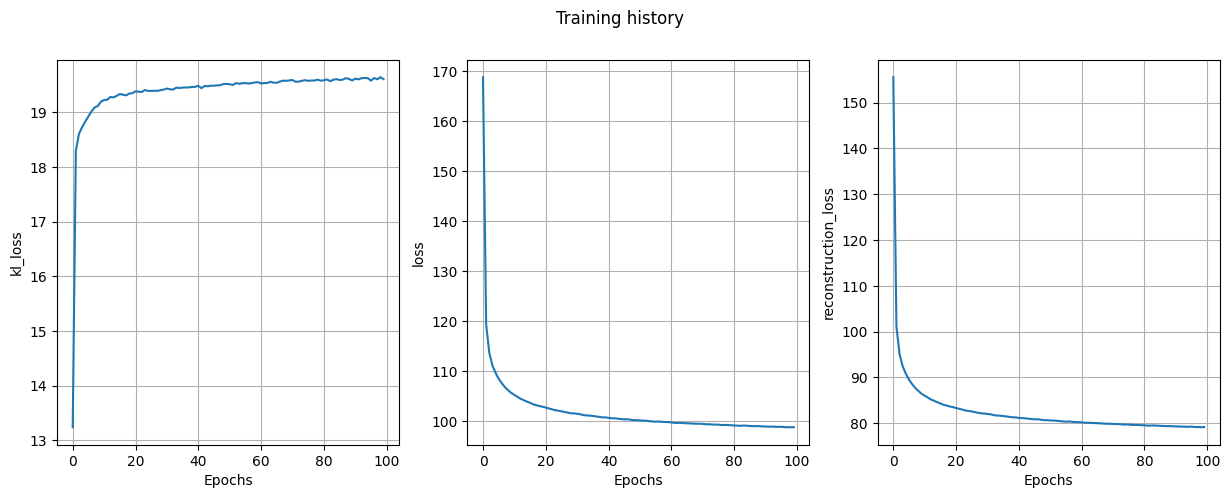

In [8]:
n_values_to_plot = len(history.history.keys())
plt.figure(figsize=(15, 5))
for i, key in enumerate(history.history.keys()):
    plt.subplot(1, n_values_to_plot, i + 1)
    plt.plot(history.history[key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.grid()
plt.suptitle("Training history")
plt.show()

## Exercise 3

Explain what each latent feature is encoding. Illustrate your explanation with visualizations.

In order to see what is happening in this scenario, we will take one sample of each class in the test set and we will use the encoder to get the latent space caracterization of each of the samples and we will try to see the behaviour they are having

In [9]:
samples_per_class = {}
for i in range(10):
    samples_per_class[i] = x_test[y_test == i][0]

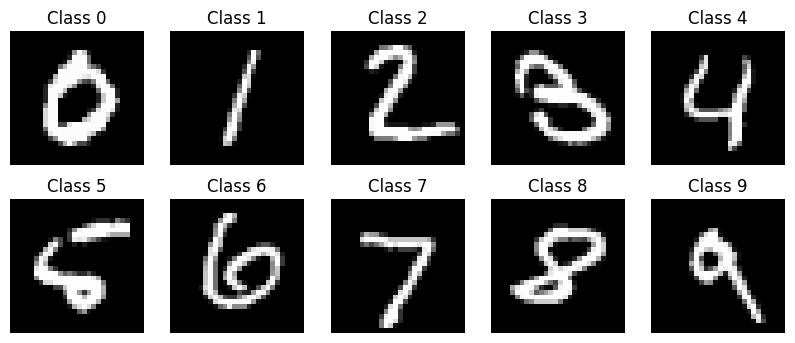

In [10]:
plt.figure(figsize=(10, 4))
for k,v in samples_per_class.items():
  plt.subplot(2,5,k+1)
  plt.imshow(v)
  plt.gray()
  plt.title(f"Class {k}")
  plt.axis("off")
plt.show()

We will now get the latent space representation of each of the samples (We will assume that elements of the same class should have a similar output, then we will only focus in only one output per class)

In order to visualize the latent space, as each element of the 10 size output will represent a feature with mean $\mu_i$ and var $\sigma_i^2$, we can plot the gaussian distribution of each one of this (We must take into account that this is possible because the covariance matrix related is diagonal).



In [11]:
def plot_latent_gaussians_violin(means, variances, samples_per_feature=500, cl = 0):
    """
    Plot violin plots of Gaussian distributions defined by mean and variance vectors.

    Parameters:
        means (array-like): Vector of means for each feature.
        variances (array-like): Vector of variances for each feature.
        samples_per_feature (int): Number of samples to draw per feature (default: 500).
    """
    means = np.asarray(means)
    variances = np.asarray(variances)
    stds = np.sqrt(variances)

    # Generate samples
    samples = []
    feature_ids = []

    for i in range(len(means)):
        s = np.random.normal(loc=means[i], scale=stds[i], size=samples_per_feature)
        samples.extend(s)
        feature_ids.extend([f'Feature {i}'] * samples_per_feature)

    df = pd.DataFrame({
        'Value': samples,
        'Feature': feature_ids
    })

    # Plot
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=df, x='Feature', y='Value', hue='Feature', palette='muted', inner='quartile', legend=False)
    plt.title(f'Gaussian Distributions per Latent Feature (Violin Plot) for sample in class {cl}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
encoder_outputs = {}

for cl, input in samples_per_class.items():
  input = np.expand_dims(input, 0)
  z_mean, z_log_var, z = vae.encoder(input)
  encoder_outputs[cl] = {
      "mean": z_mean.numpy()[0],
      "var": np.exp(z_log_var.numpy()[0]),
      "z": z.numpy()[0]
  }


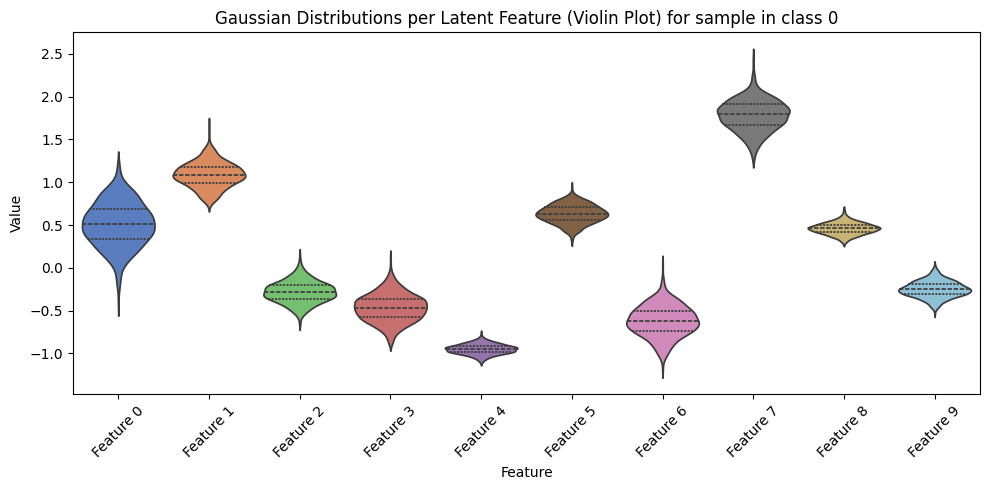

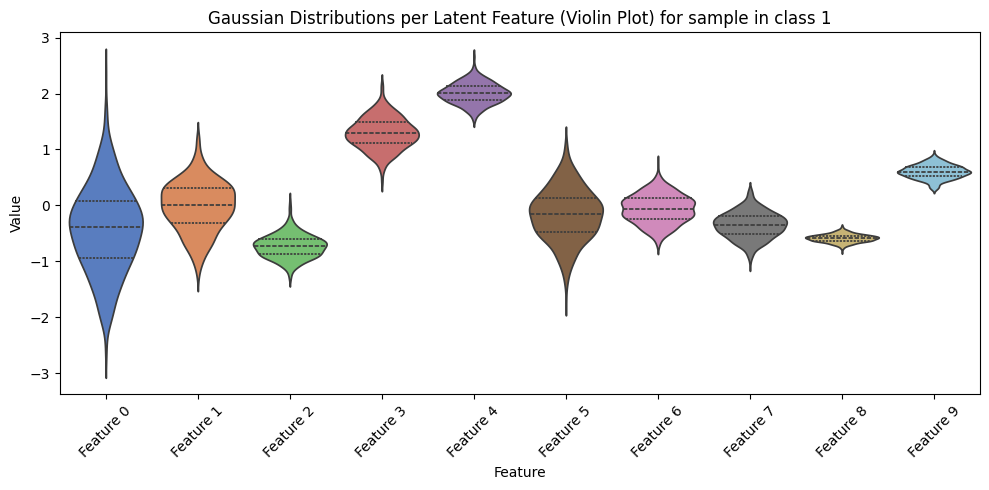

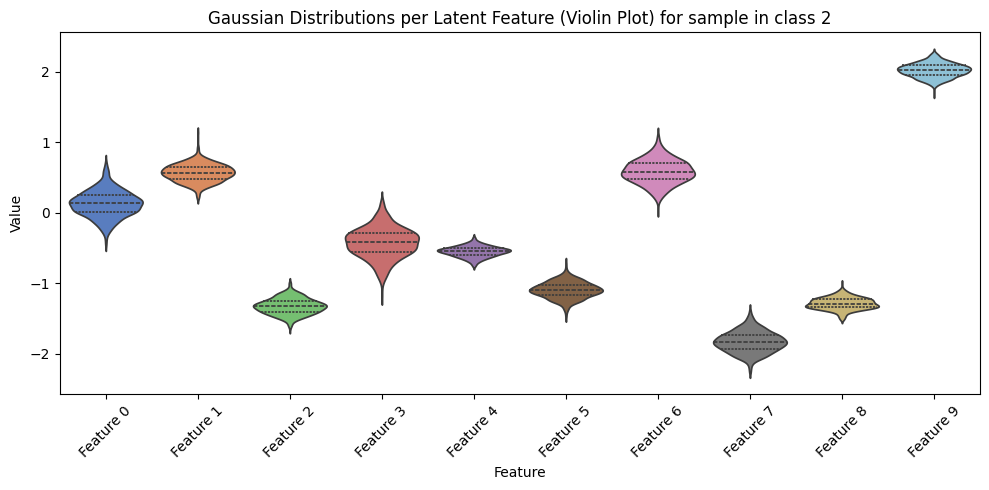

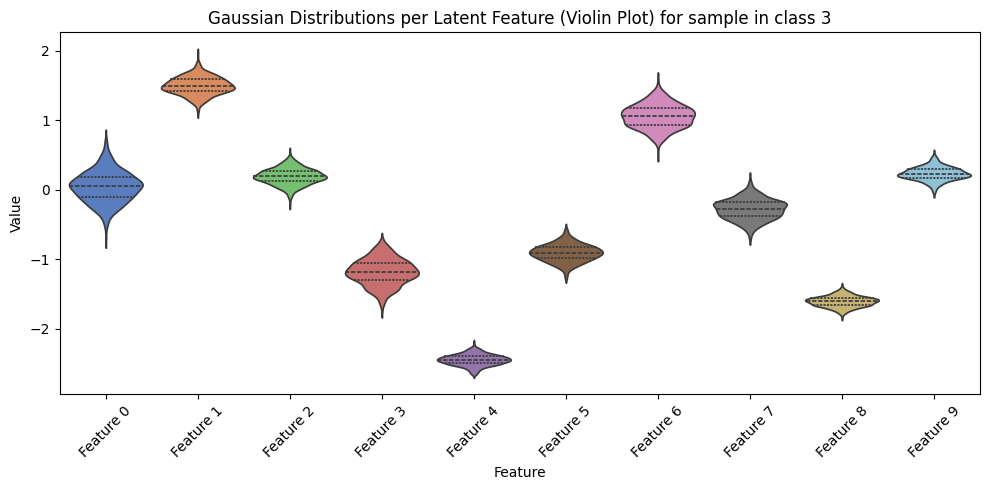

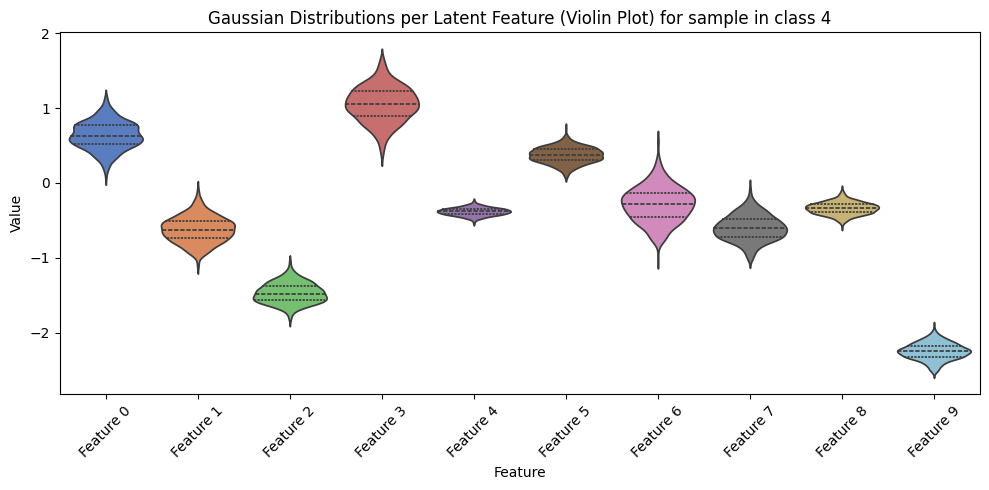

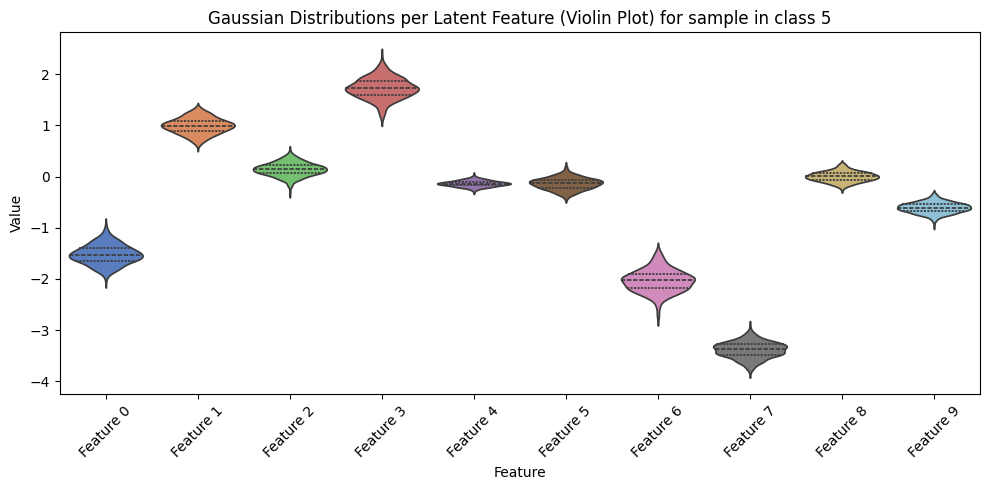

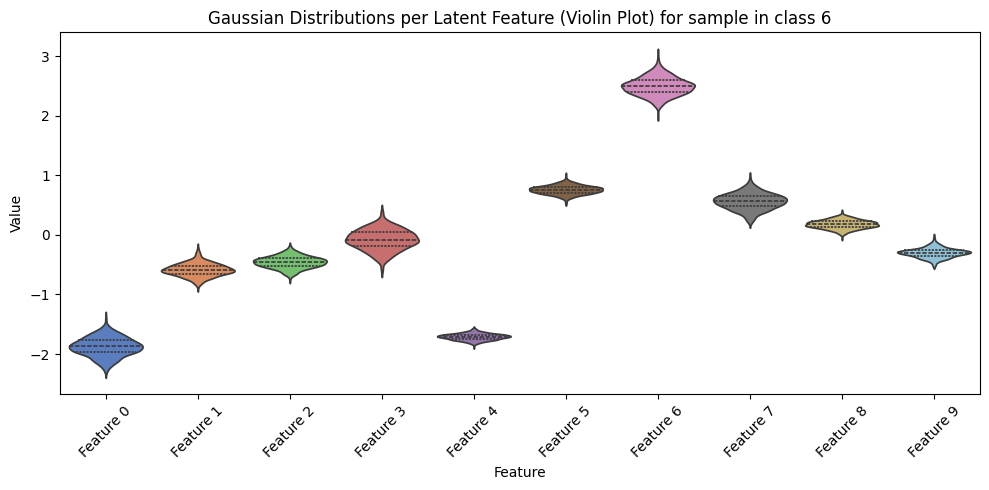

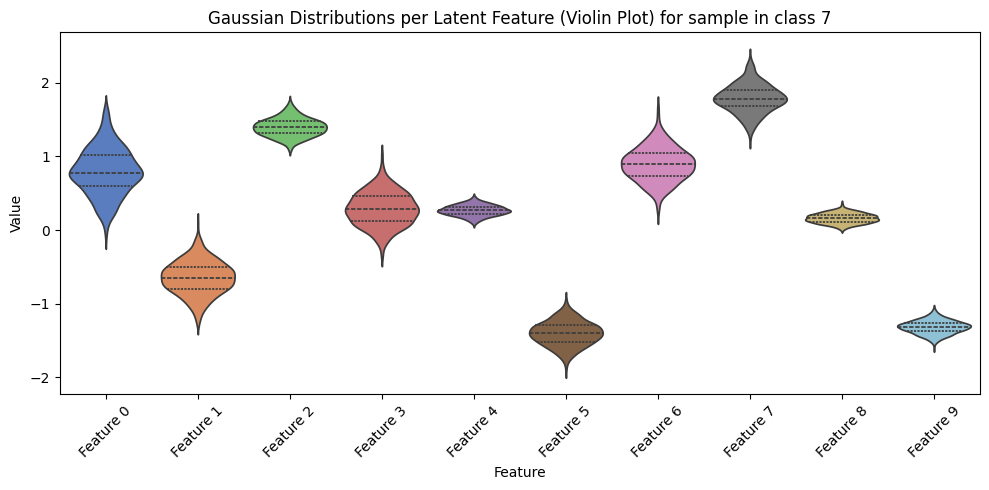

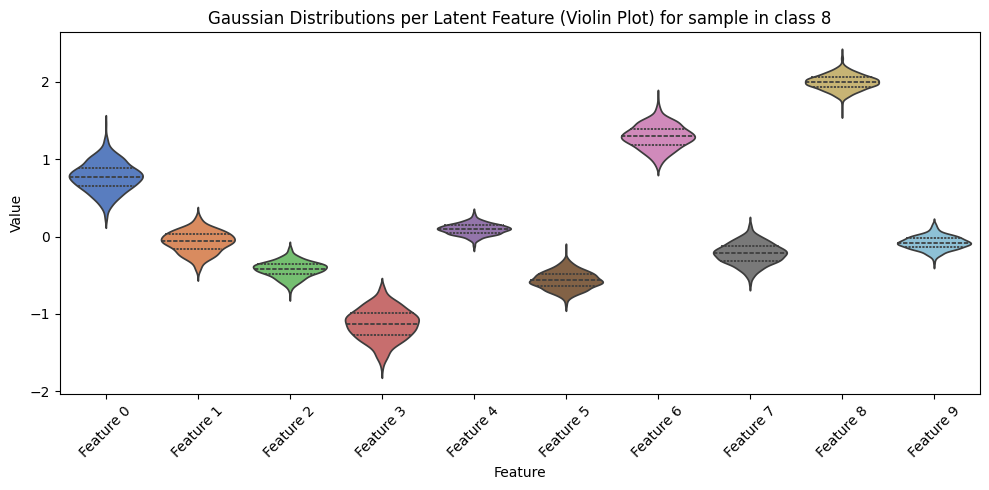

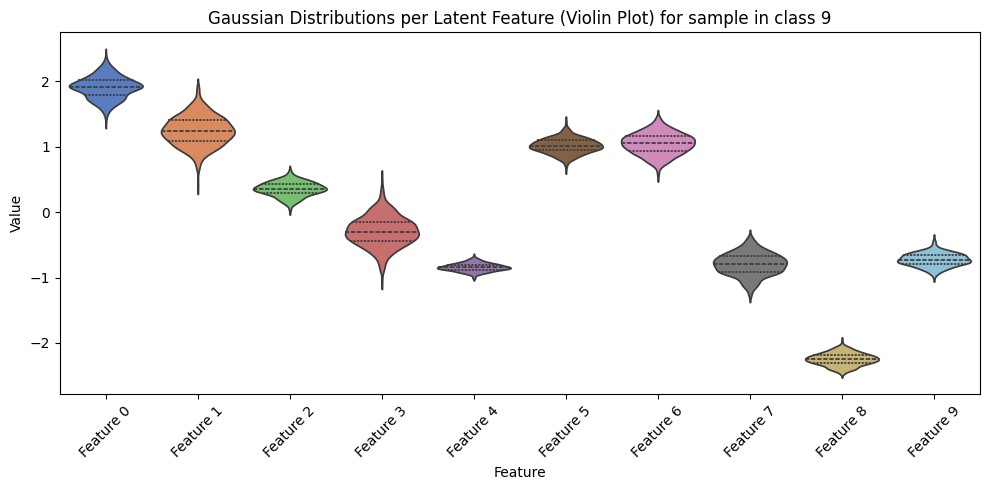

In [13]:
for cl, dict_ in encoder_outputs.items():
  mu = dict_["mean"]
  var = dict_["var"]
  plot_latent_gaussians_violin(mu, var, cl=cl)

Now we will take the $z$ value sampled by the encoder and we will reconstruct the image, comparing the input with the output recovered.

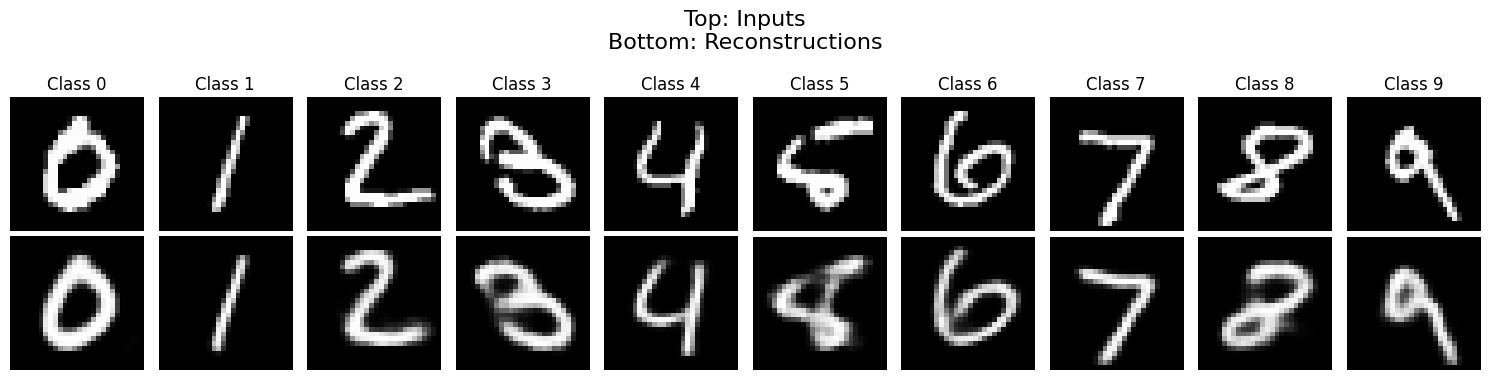

In [14]:
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for cl in range(10):
    # Get input and reconstruction
    input_img = samples_per_class[cl]
    z_encoded = encoder_outputs[cl]["z"]
    reconstructed = vae.decoder(np.expand_dims(z_encoded, 0))[0]

    # Top row: original input
    axes[0, cl].imshow(input_img)
    axes[0, cl].set_title(f"Class {cl}")
    axes[0, cl].axis("off")

    # Bottom row: reconstruction
    axes[1, cl].imshow(reconstructed)
    axes[1, cl].axis("off")

plt.suptitle("Top: Inputs\nBottom: Reconstructions", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

## Exercise 4

 Choose two image from different classes. Create a set of images that represent a smooth
transition from one image to the other.

In order to make this transition process, we will choose two images and take their representations in the latent space. We will call them $z_1$ and $z_2$. In order to make the transition, we will make a function:

$$f(\alpha) = \alpha \, z_1 + (1-\alpha) \, z_2$$

And we will vary the value $\alpha$ between 0 and 1 (When value is 0 we will have as image the reconstrucion of $z_2$ and when the value is 1 we will have the reconstruction of $z_1$) and the different values will show the transition between images

We will show transitions for every pair of numbers

In [15]:
def plot_transitions_by_index(z1_i,z2_i,num_samples=15):
  z1 = encoder_outputs[z1_i]["z"]
  z2 = encoder_outputs[z2_i]["z"]
  plt.figure(figsize=(num_samples, 2))
  for i in range(num_samples):
      alpha = i / (num_samples - 1)
      z_transition = alpha * z1 + (1 - alpha) * z2
      plt.subplot(1, num_samples, i + 1)
      plt.imshow(vae.decoder(np.expand_dims(z_transition, 0))[0])
      plt.axis("off")
  plt.suptitle(f"Transition between {z2_i} and {z1_i} samples", fontsize=18)
  plt.subplots_adjust(top=0.3)
  plt.tight_layout()
  plt.show()

def plot_transitions(z1,z2,num_samples=15):
  plt.figure(figsize=(num_samples, 2))
  for i in range(num_samples):
      alpha = i / (num_samples - 1)
      z_transition = alpha * z1 + (1 - alpha) * z2
      plt.subplot(1, num_samples, i + 1)
      plt.imshow(vae.decoder(np.expand_dims(z_transition, 0))[0])
      plt.axis("off")
  plt.suptitle(f"Transition between samples", fontsize=18)
  plt.subplots_adjust(top=0.3)
  plt.tight_layout()
  plt.show()

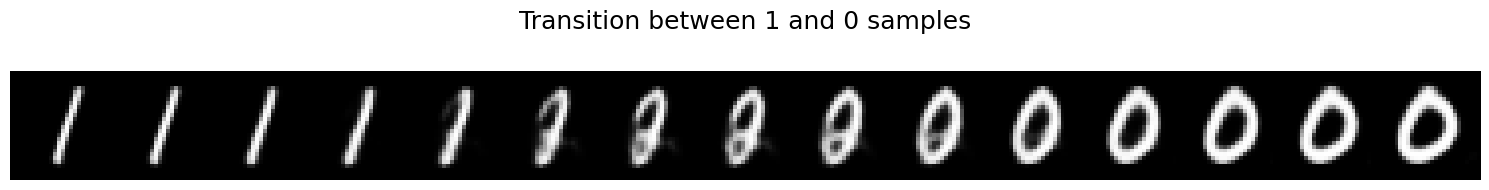

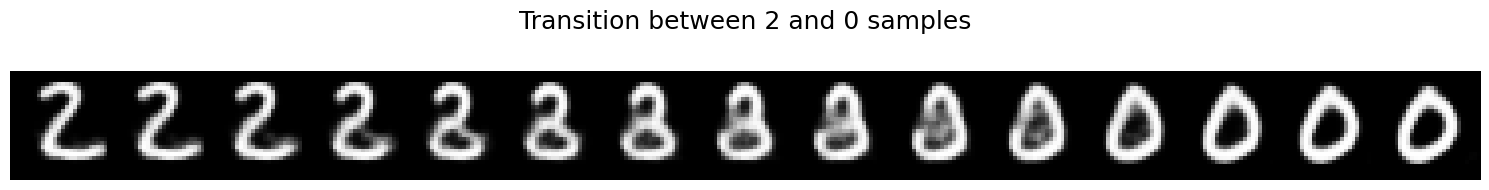

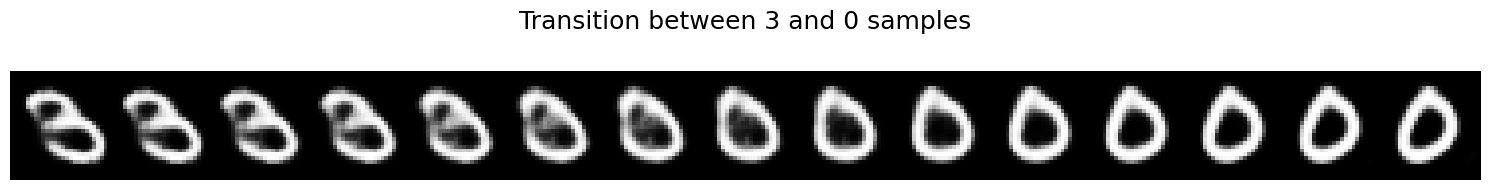

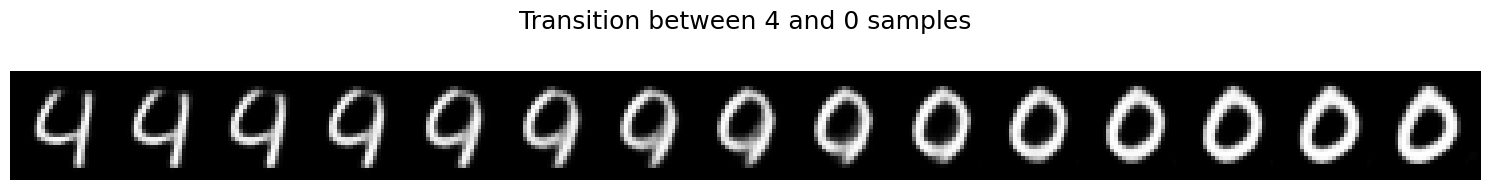

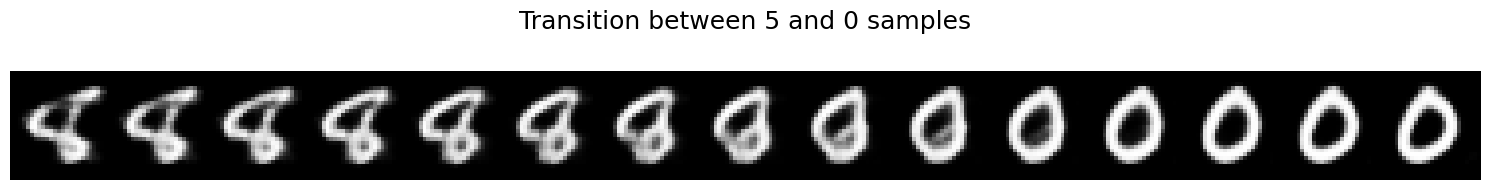

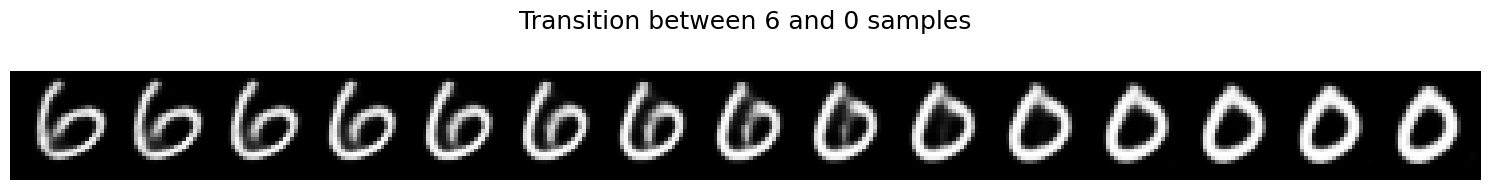

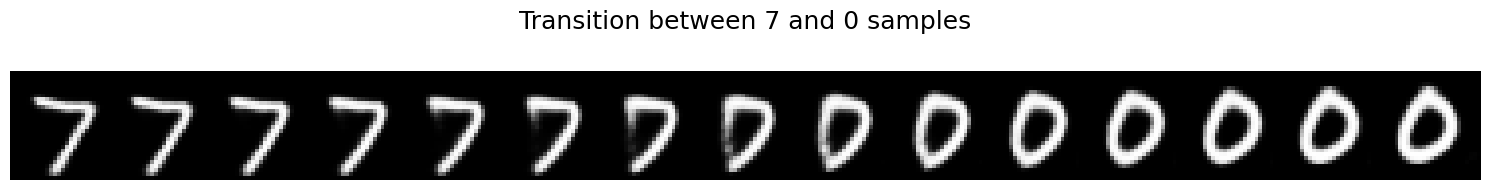

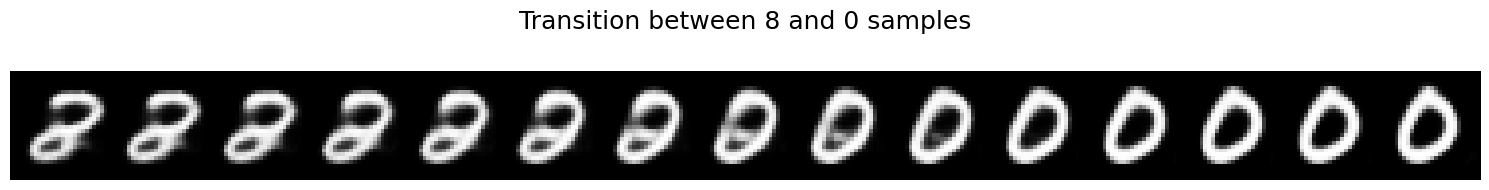

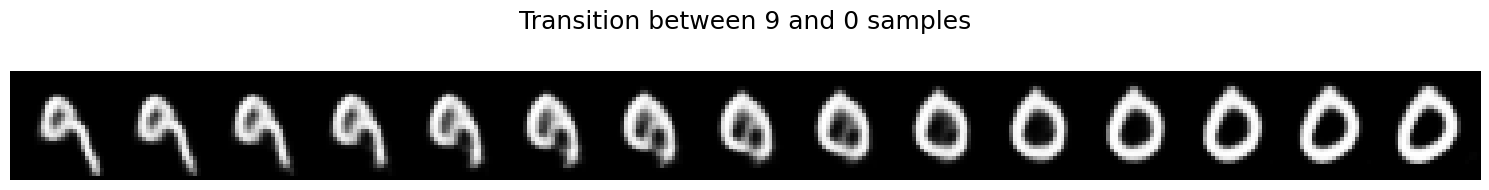

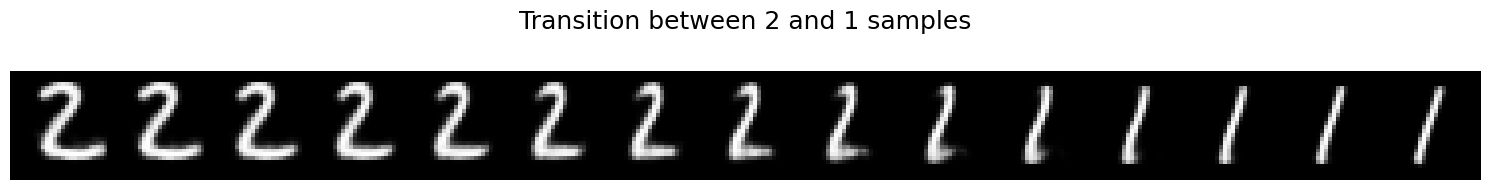

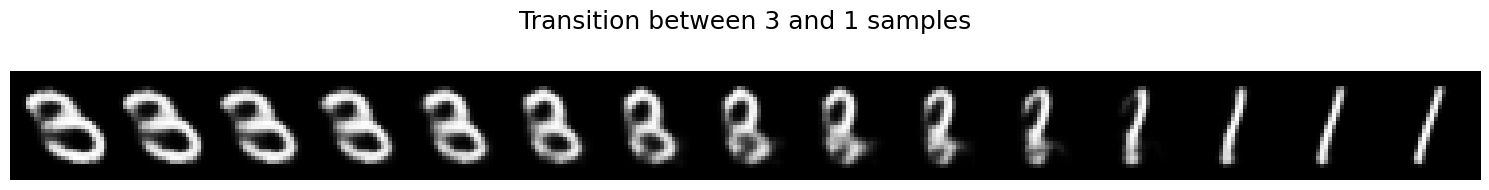

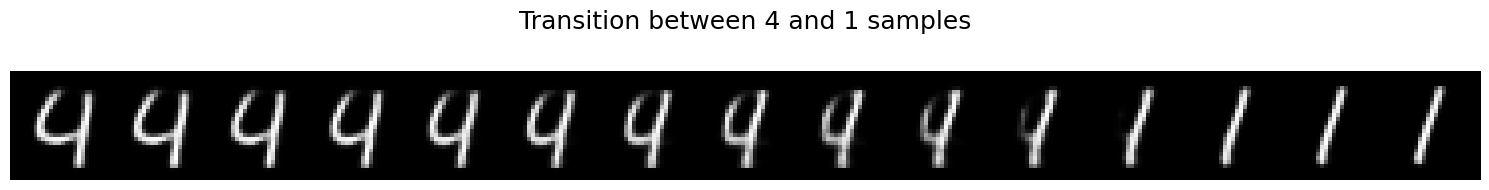

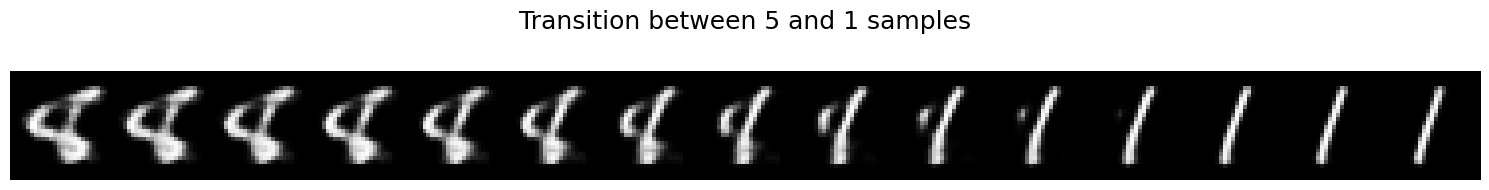

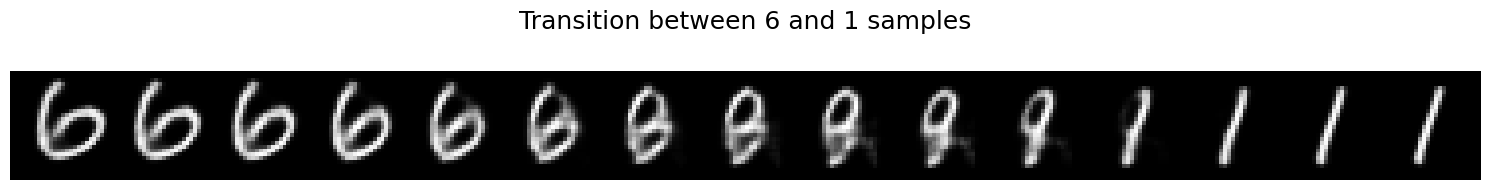

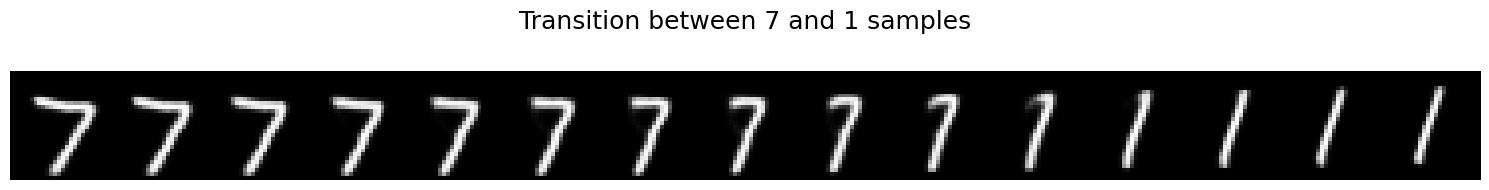

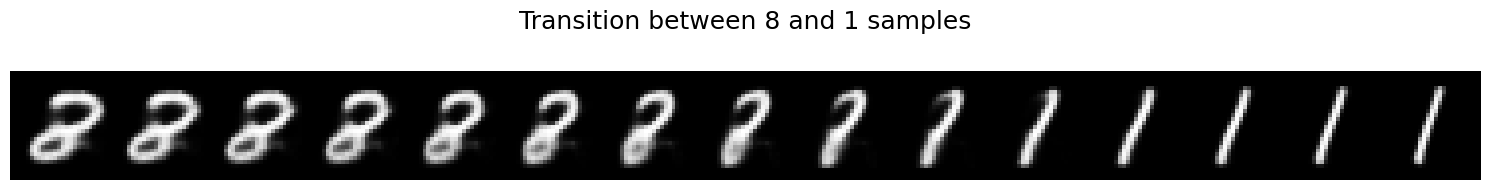

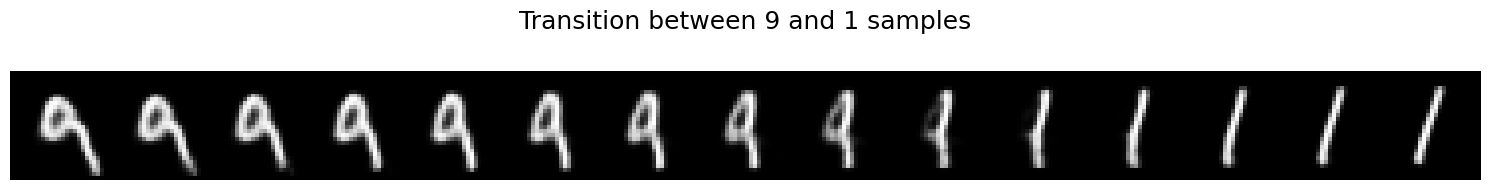

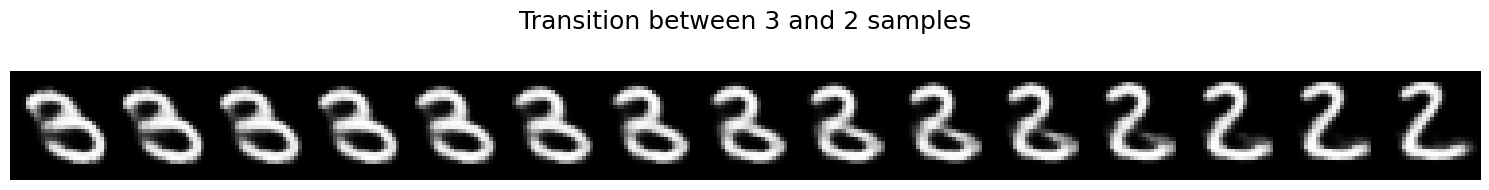

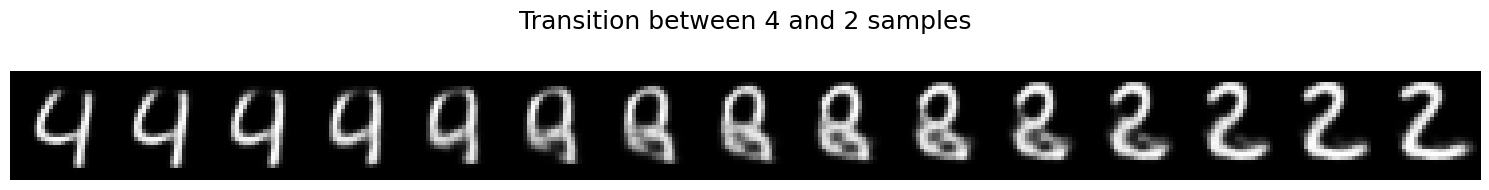

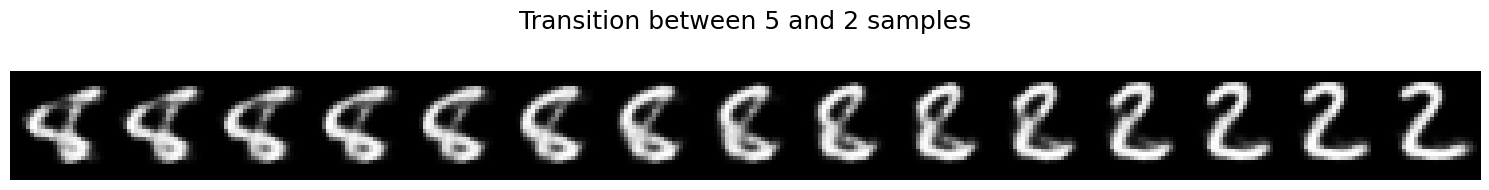

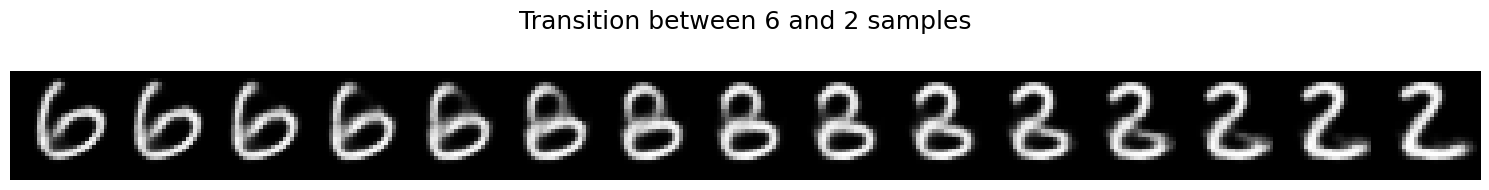

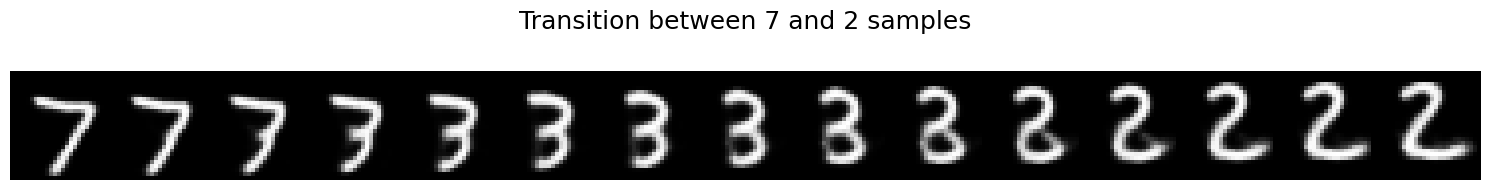

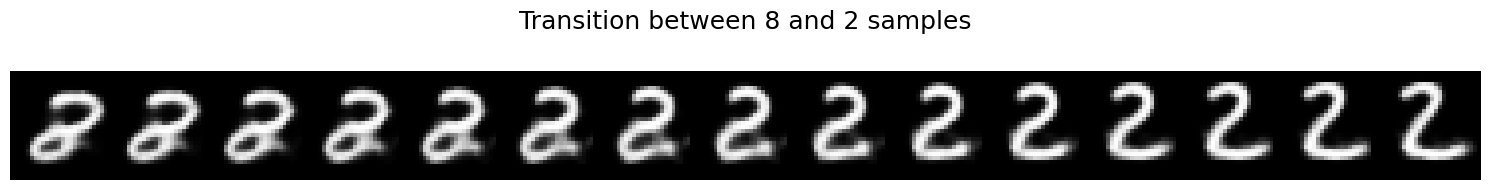

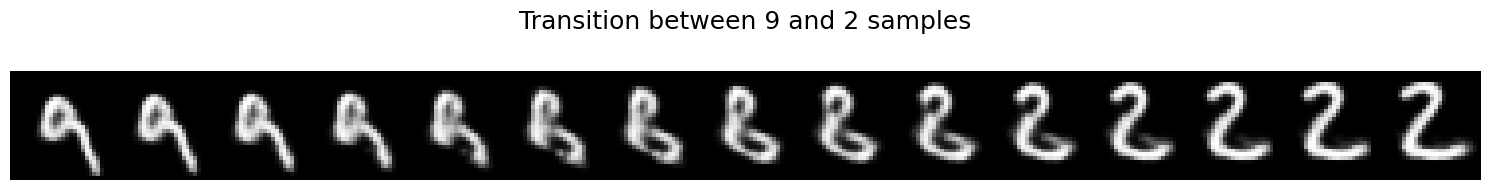

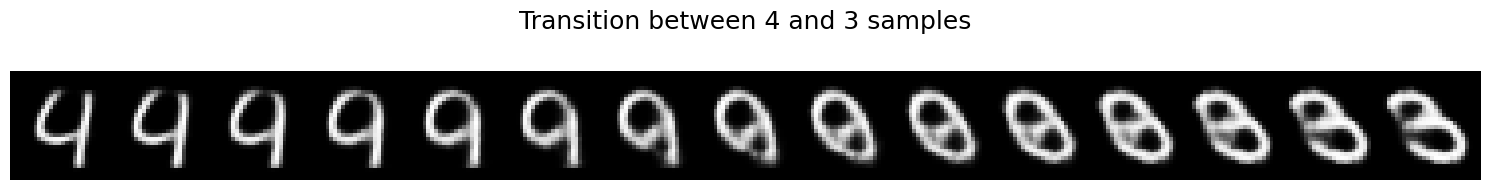

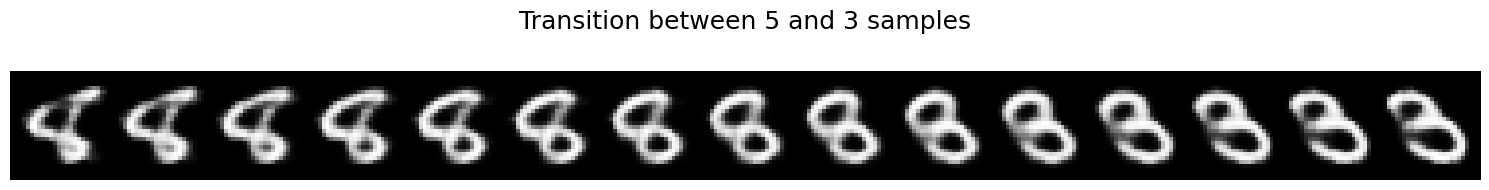

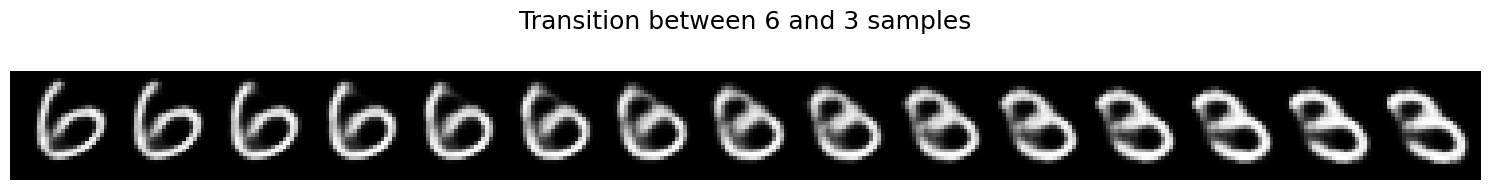

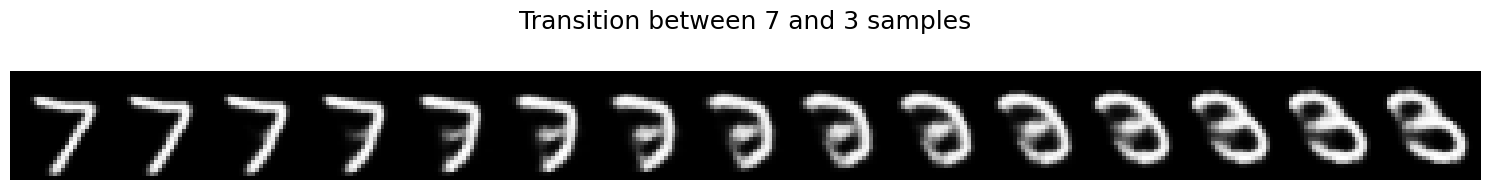

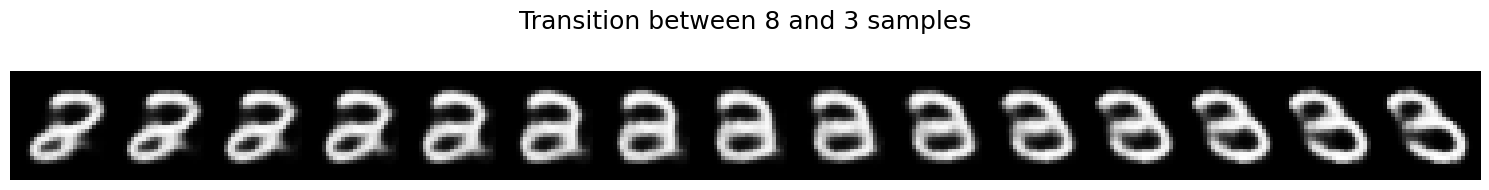

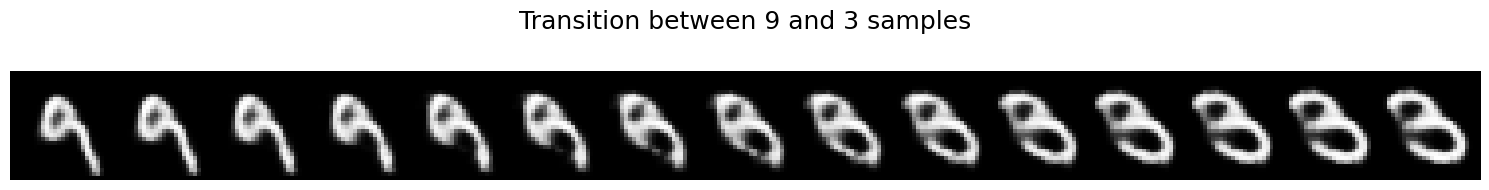

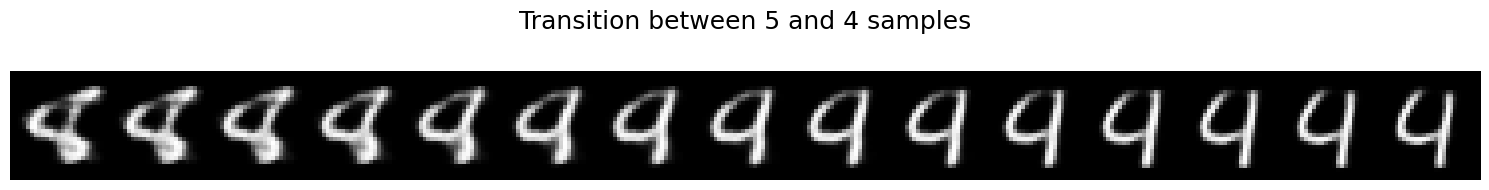

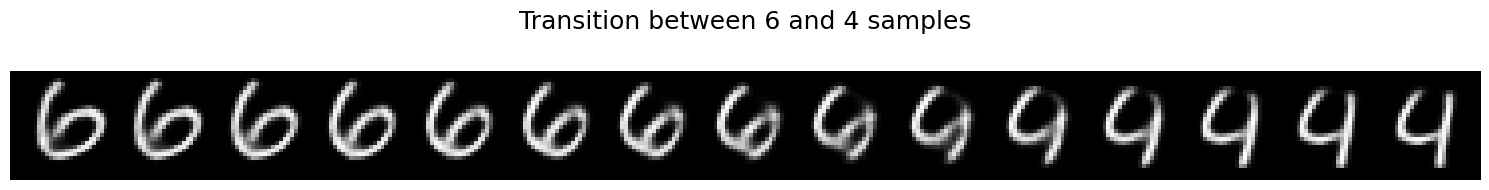

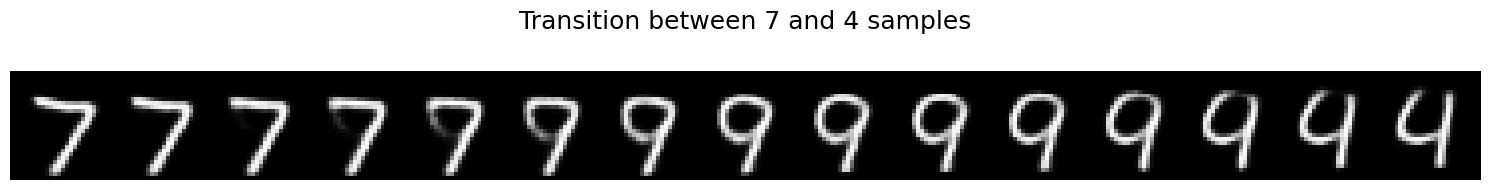

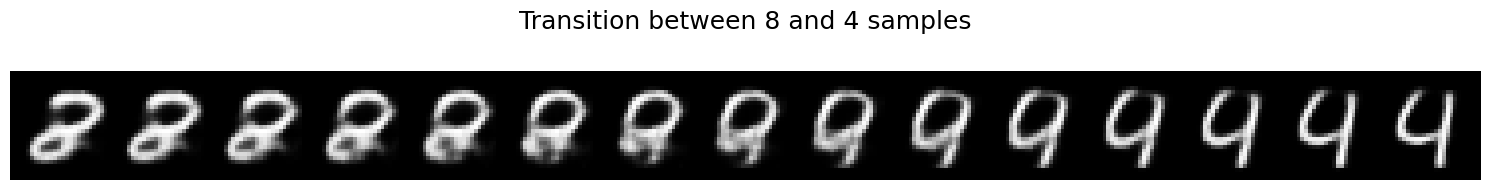

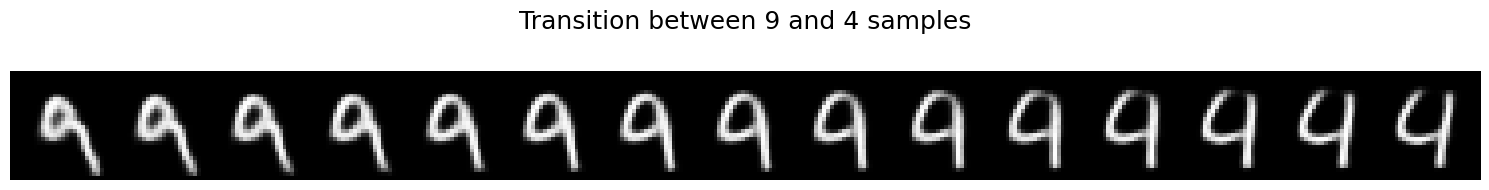

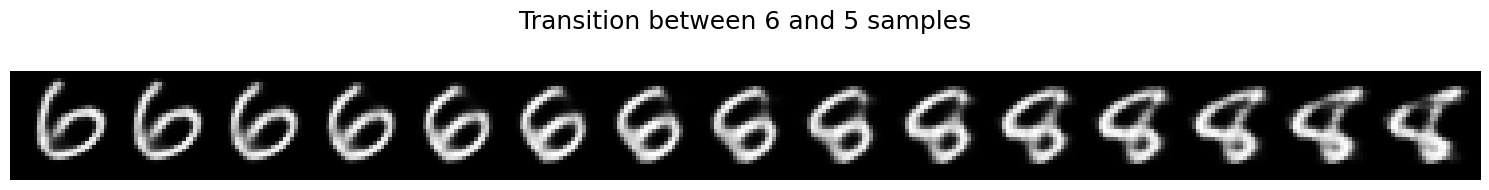

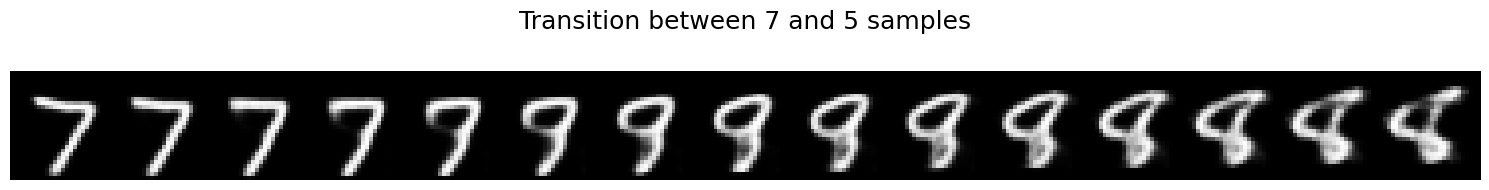

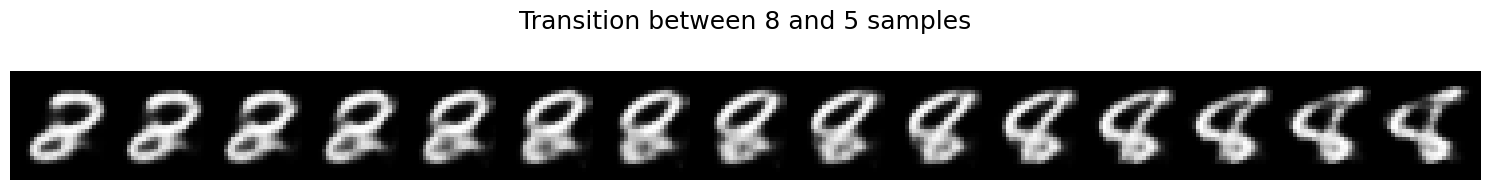

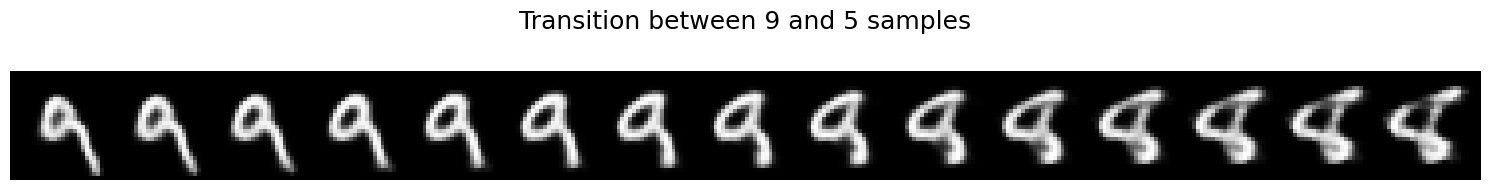

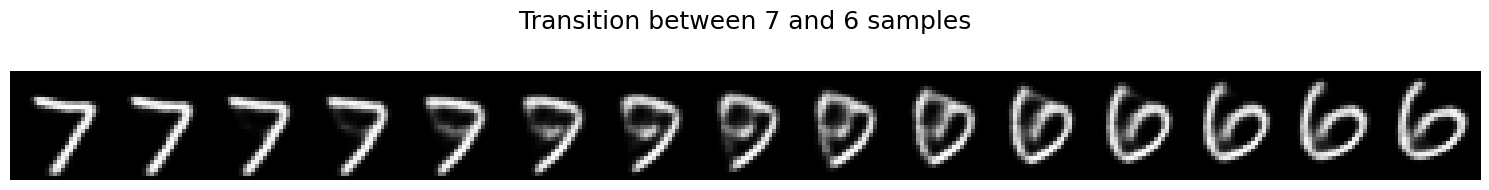

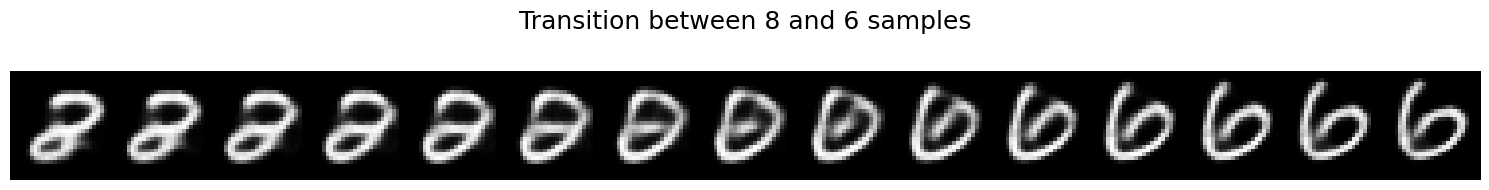

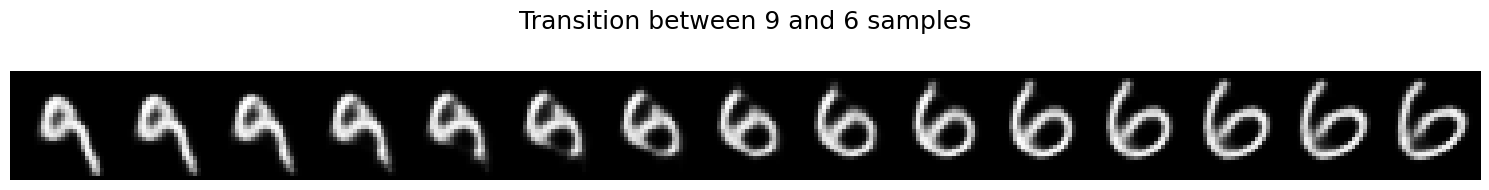

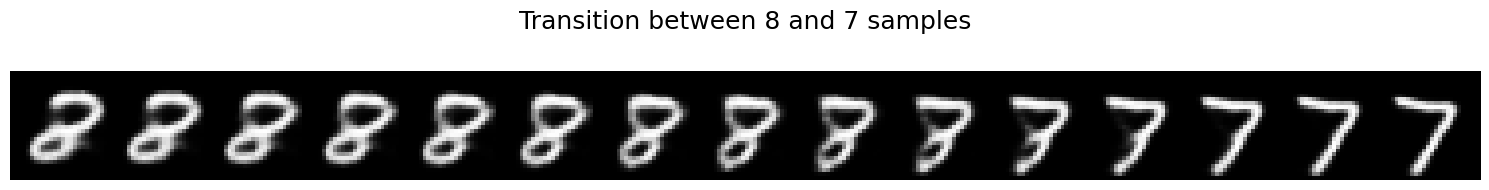

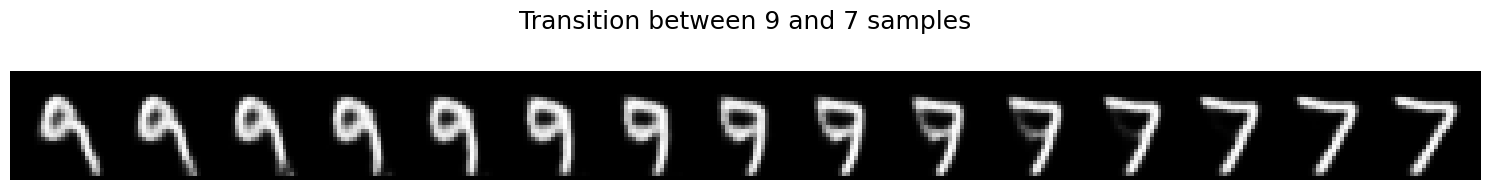

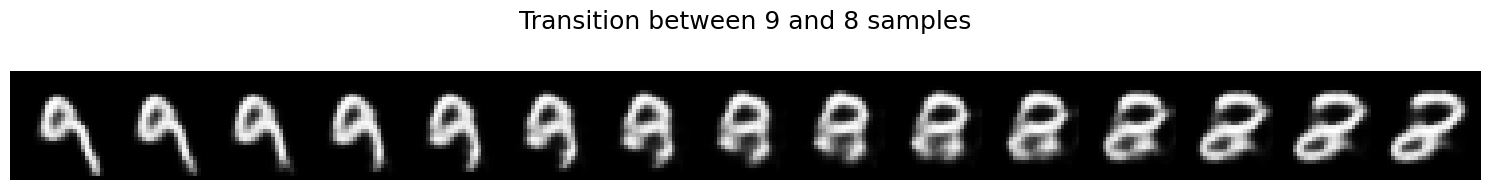

In [16]:
for i,j in combinations(range(10), 2):
  plot_transitions_by_index(i,j)

As a final experiment, we will plot the transitions over two random samples from the latent space, in order to see which number is codified and how smooth does the transition looks

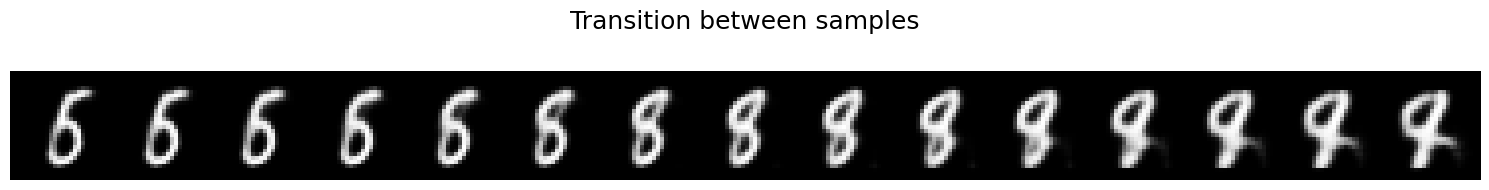

In [24]:
#Running this cell several times may bring different results
z1 = np.random.normal(size=10)
z2 = np.random.normal(size=10)
plot_transitions(z1,z2)

## References

[Bis24] Bishop, C. M. & Bishop H. Deep Learning: Foundations and Principles, Springer, 2024.